# 5. Images with Python
## Loading coursework 1 images
The coursework 1 requires loading images from a .mat (Matlab file). You can load the data as follows:

In [6]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat('assets/face.mat')

mat_content # Let's see the content... 


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

`X` contains the face data, each column is one image from a total of 520 images. `l` contains the label (face identity) for each image    


In [7]:
face_data = mat_content['X']

print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)


We can pick one face image, for example the indexed as number `157`:

In [8]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


To visualise it as an image, we need to transform from a vector to a 2D image matrix (46x56 pixels):

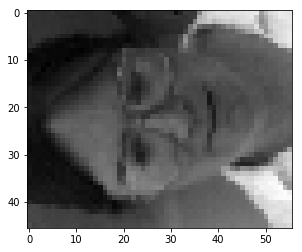

In [9]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

Let's transpose it...

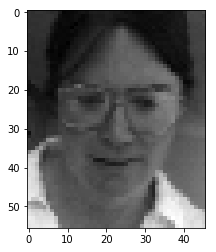

In [10]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

This face image belongs to identity:

In [11]:
face_labels = mat_content['l']
print(face_labels.shape)
print(face_labels[0,157])

(1, 520)
16


Let's check the pixel values

In [12]:
print(face_157)

[[ 55  53  56 ...  70  69  75]
 [ 55  54  54 ...  70  69  66]
 [ 54  55  55 ...  69  70  69]
 ...
 [188 185 176 ... 172 172 168]
 [184 185 180 ... 178 179 168]
 [182 184 184 ... 181 181 174]]


Or some particular coordinates:

In [13]:
pixel_row = 21
pixel_column = 33
print(face_157[pixel_row,pixel_column])

104


## Images as vectors 

You can perform operations on images, for example compute the average image of two images:

[105. 108. 122. ...  83.  67.  58.]


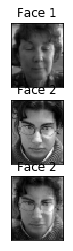

In [14]:
face_1 = face_data[:,5]
face_2 = face_data[:,180]

avg_face = (0.5*face_1 + 0.5*face_2)

plt.subplot(311), plt.imshow(np.reshape(face_1,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 1'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(np.reshape(face_2,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 2'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')
plt.title('Face 2'), plt.xticks([]), plt.yticks([])

print(avg_face)
plt.show()


Or we can use numpy function...

(2, 2576)


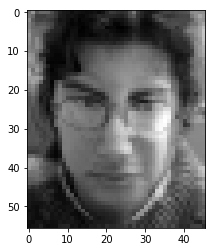

In [15]:
face_stack = np.vstack((face_1,face_2))
print(face_stack.shape)

avg_face_numpy = np.mean(face_stack, axis = 0)
plt.imshow(np.reshape(avg_face_numpy,(46,56)).T, cmap = 'gist_gray')

## OpenCV (optional)

Although you won't need this for your coursework, if you are curious on how you can work with general we provide a short intro to OpenCV. [OpenCV](https://opencv.org/) (Open Source Computer Vision) is a library of programming functions aimed at real-time computer vision. It is multiplatform and has C++, Java and Python interfaces. 

OpenCV has several state-of-the-art and classic computer vision and image processing algorithms. If you are running this notebook in your PC you will need to install the package before being able to run it.

For a good list of examples you can check out the [official tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html).

## Image operations

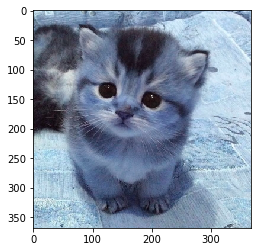

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = cv2.imread('assets/cat.jpg')
plt.imshow(img)


OpenCV reads the images in BGR format, for visualisation we need to convert them to RGB:

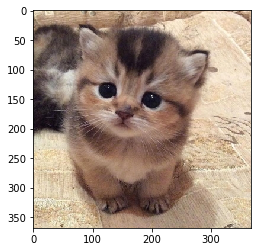

In [17]:
img_rgb = img[:,:,::-1]
plt.imshow(img_rgb)



Try using one of your own images! Or if you want more cute cat pictures you can check [this](https://pypi.org/project/random-cat/) Python library that gives you a random cat picture with a single function call.

With OpenCV you can do interesting operations such as detecting edges on an image:

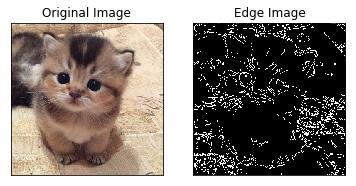

In [18]:
edges = cv2.Canny(img_rgb,100,200)

plt.subplot(121),plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Apply some filters...

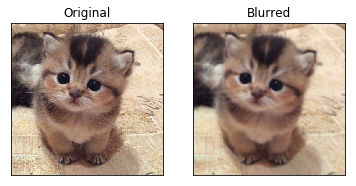

In [19]:
blur = cv2.blur(img_rgb,(5,5))

plt.subplot(121),plt.imshow(img_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Or detect corners on an image and write them to an output image:

In [20]:
img_imperial = cv2.imread('assets/Imperial-College.jpg')
gray = cv2.cvtColor(img_imperial,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
print(ret.shape, ret.labels, stats.shape, centroids.shape)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img_detected = img_imperial
img_detected[res[:,1],res[:,0]]=[0,0,255]
img_detected[res[:,3],res[:,2]] = [0,255,0]

# plt.imshow(img_imperial[:,:,::-1])
# cv2.imwrite('assets/corners.png',img_detected)


AttributeError: 'int' object has no attribute 'shape'

Check out the result on the `assets` folder !